In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# sun_power = pd.read_excel('sun_power.xlsx', header=-5)
sun_df = pd.read_excel('sun_power.xlsx',parse_dates=['Unnamed: 1'], skiprows=5)
weather_h = pd.read_excel('weather.xlsx', parse_dates=['일시'])
weather_m = pd.read_excel('weather.xlsx', parse_dates=['일시'], sheet_name='1분 단위 Data')

## 전처리(col, row 날리기)

In [2]:

# wando[wando['최고기온(°C)'].isnull()].index
# [출처] Null(결측치) 값 인덱스 찾기|작성자 감귤

In [3]:
sun_df = sun_df.drop(sun_df.columns[0], axis=1)

In [4]:
sun_df = sun_df.drop(sun_df.index[0])
sun_df.head(1)

,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
1,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [5]:
weather_m.drop('지점', axis=1, inplace=True)
weather_h.drop('지점', axis=1, inplace=True)

In [6]:
weather_h.head(1)

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위)
0,03-01 00:00:00,3.1,0.5,3.6,340,96,1001.3,NaN,NaN,NaN,NaN


In [7]:
weather_m.head(1)

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,03-01 00:01:00,3.0,0.0,345.3,3.2,1001.4,1005.0,95.6,0.0,0


## 컬럼명 변경하기

컬럼명 변경 : df.rename(columns={df.columns[0]:"TT"}, inplace = True)

컬럼명 변경 : df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)


새로운 컬럼 생성 : sun_df['일시'] = sun_df[sun_df.columns[0]]

In [8]:
sun_df.rename(columns={sun_df.columns[0]:"일시"}, inplace=True)

In [9]:
sun_df.head(1)

,일시,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
1,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [10]:
len(weather_m)

8636

In [11]:
len(sun_df)

576

## Merge : sun - weather 

In [12]:
df = pd.merge(weather_m, sun_df, how='inner')

## Merge : 검증

merge한 df길이와 sun_df 길이가 달랐다. 분명 무슨 자료가 빠졌다

In [13]:
weather_m['일시'].isnull().sum()

0

In [14]:
sun_df['일시'].isnull().sum()

0

In [15]:
len(weather_m)

8636

In [16]:
len(sun_df), len(df)

(576, 574)

    왜 이럴까? 
    -- 기상데이터(weather_m)에 4개 값이 빠져있음 
    -- 결측치가 아니니 헷갈렸다

In [17]:
df.columns

Index(['일시', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)', '일사량', '외기온도', '모듈온도',
       '총 전력(AC)', 'DC전압', 'DC전류', 'DC전력', 'R상 전압', 'S상 전압', 'T상 전압', 'R상 전류',
       'S상 전류', 'T상 전류', 'AC전력', '전압', '전류', '전압.1', '전류.1', '전압.2', '전류.2',
       '전압.3', '전류.3', '전압.4', '전류.4', '전압.5', '전류.5', '전압.6', '전류.6', '전압.7',
       '전류.7', '전압.8', '전류.8', '전압.9', '전류.9', '전압.10', '전류.10', '전압.11',
       '전류.11', '전압.12', '전류.12', '전압.13', '전류.13', '전압.14', '전류.14', '전압.15',
       '전류.15', 'DC전압.1', 'DC전류.1', 'DC전력.1', 'R상 전압.1', 'S상 전압.1', 'T상 전압.1',
       'R상 전류.1', 'S상 전류.1', 'T상 전류.1', 'AC전력.1', '전압.16', '전류.16', '전압.17',
       '전류.17', '전압.18', '전류.18', '전압.19', '전류.19', '전압.20', '전류.20', '전압.21',
       '전류.21', '전압.22', '전류.22', '전압.23', '전류.23', '전압.24', '전류.24', '전압.25',
       '전류.25', '전압.26', '전류.26', '전압.27', '전류.27', '전압.28', '전류.28'],
      dtype='object')

In [18]:
df = df[df['총 전력(AC)'] != 0]

In [19]:
df.reset_index(inplace=True)

In [20]:
df.drop('index', axis=1, inplace=True)

In [21]:
len(df)

256

In [22]:
df.head()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,03-01 08:00:00,1.0,1.8,323.3,8.1,1006.3,1009.9,82.4,0.05,0,...,684.251,0.121517,685.028,0.160272,651.324,0.0178046,650.368,0.2,655.004,0.0365714
1,03-01 08:15:00,0.9,1.8,311.9,6.7,1006.8,1010.4,76.8,0.13,180,...,679.764,0.217171,679.51,0.220412,686.923,0.22527,684.861,0.396524,690.872,0.374267
2,03-01 08:30:00,0.6,1.8,320.7,6.5,1007.5,1011.1,74.8,0.27,1080,...,674.497,0.683355,674.682,0.685552,684.33,0.74578,683.681,0.781688,687.771,0.755135
3,03-01 08:45:00,0.7,1.8,324.4,7.7,1007.8,1011.4,74.2,0.48,1980,...,651.594,0.896186,651.48,0.99181,735.44,0.936347,734.303,0.91872,739.412,0.910791
4,03-01 09:00:00,0.3,1.8,300.1,9.2,1008.2,1011.8,70.6,0.74,2880,...,713.569,1.2512,713.992,2.70951,728.913,2.78955,725.87,2.77604,729.903,2.65572


In [23]:
date = df['일시']

In [24]:
df.drop('일시', axis=1, inplace=True)

## 셋 분리

In [26]:
df.head()

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),일사량,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,1.0,1.8,323.3,8.1,1006.3,1009.9,82.4,0.05,0,17.4757,...,684.251,0.121517,685.028,0.160272,651.324,0.0178046,650.368,0.2,655.004,0.0365714
1,0.9,1.8,311.9,6.7,1006.8,1010.4,76.8,0.13,180,35.4377,...,679.764,0.217171,679.51,0.220412,686.923,0.22527,684.861,0.396524,690.872,0.374267
2,0.6,1.8,320.7,6.5,1007.5,1011.1,74.8,0.27,1080,79.5366,...,674.497,0.683355,674.682,0.685552,684.33,0.74578,683.681,0.781688,687.771,0.755135
3,0.7,1.8,324.4,7.7,1007.8,1011.4,74.2,0.48,1980,111.925,...,651.594,0.896186,651.48,0.99181,735.44,0.936347,734.303,0.91872,739.412,0.910791
4,0.3,1.8,300.1,9.2,1008.2,1011.8,70.6,0.74,2880,311.672,...,713.569,1.2512,713.992,2.70951,728.913,2.78955,725.87,2.77604,729.903,2.65572


In [25]:
len(df)

256

In [26]:
256*0.75

192.0

In [28]:
df=df.astype(float)


In [29]:
# X_train = train.drop('총 전력(AC)', axis=1)
# y_train = train[['총 전력(AC)']]

# X_test = test.drop('총 전력(AC)', axis=1)
# y_test = test[['총 전력(AC)']]

## 스케일

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
df_s = scaler.fit_transform(df)


In [59]:
data = pd.DataFrame(df_s, columns=df.columns)

In [60]:
df.columns

Index(['기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)', '해면기압(hPa)',
       '습도(%)', '일사(MJ/m^2)', '일조(Sec)', '일사량', '외기온도', '모듈온도', '총 전력(AC)',
       'DC전압', 'DC전류', 'DC전력', 'R상 전압', 'S상 전압', 'T상 전압', 'R상 전류', 'S상 전류',
       'T상 전류', 'AC전력', '전압', '전류', '전압.1', '전류.1', '전압.2', '전류.2', '전압.3',
       '전류.3', '전압.4', '전류.4', '전압.5', '전류.5', '전압.6', '전류.6', '전압.7', '전류.7',
       '전압.8', '전류.8', '전압.9', '전류.9', '전압.10', '전류.10', '전압.11', '전류.11',
       '전압.12', '전류.12', '전압.13', '전류.13', '전압.14', '전류.14', '전압.15', '전류.15',
       'DC전압.1', 'DC전류.1', 'DC전력.1', 'R상 전압.1', 'S상 전압.1', 'T상 전압.1',
       'R상 전류.1', 'S상 전류.1', 'T상 전류.1', 'AC전력.1', '전압.16', '전류.16', '전압.17',
       '전류.17', '전압.18', '전류.18', '전압.19', '전류.19', '전압.20', '전류.20', '전압.21',
       '전류.21', '전압.22', '전류.22', '전압.23', '전류.23', '전압.24', '전류.24', '전압.25',
       '전류.25', '전압.26', '전류.26', '전압.27', '전류.27', '전압.28', '전류.28'],
      dtype='object')

In [61]:
data.head(1)

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),일사량,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,0.37037,0.202247,0.902568,0.852632,0.0,0.0,0.827508,0.002509,0.0,0.008385,...,0.593442,0.012006,0.591047,0.015623,0.23915,0.001738,0.243904,0.019468,0.246967,0.003563


In [62]:
X = data.drop('총 전력(AC)', axis=1)
y = data[['총 전력(AC)']]

X.head(1)

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),일사량,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,0.37037,0.202247,0.902568,0.852632,0.0,0.0,0.827508,0.002509,0.0,0.008385,...,0.593442,0.012006,0.591047,0.015623,0.23915,0.001738,0.243904,0.019468,0.246967,0.003563


In [63]:
y.head(1)

,총 전력(AC)
0,0.008449


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
X_train.head(1)

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),일사량,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
132,0.703704,0.044944,0.134841,0.115789,0.325688,0.321101,1.0,0.003512,0.0,0.031239,...,0.554109,0.038007,0.56146,0.038121,0.435825,0.037209,0.442484,0.035821,0.447735,0.035703


In [67]:
y_train.head(1)

,총 전력(AC)
132,0.037727


In [68]:
from sklearn.ensemble import RandomForestRegressor

RF2 = RandomForestRegressor(n_estimators=1000, max_features=90, max_depth=20, min_samples_split=3,min_samples_leaf=2, random_state=42, verbose = 2)

In [69]:
RF2.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 1

building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000
building tree 456 of 1000
building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000
building tree 460 of 1000
building tre

building tree 791 of 1000
building tree 792 of 1000
building tree 793 of 1000
building tree 794 of 1000
building tree 795 of 1000
building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000
building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=90, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=2, warm_start=False)

In [70]:
pre_R2 = RF2.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
import math
import numpy as np

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, pre_R2))
rmse

0.012014462013015087

In [74]:
pre_R2

array([0.80197923, 0.42925762, 0.54329218, 0.41817502, 0.77254434,
       0.49727946, 0.74439109, 0.01322739, 0.63662696, 0.39282884,
       0.36579573, 0.37087042, 0.87884183, 0.27407084, 0.26043959,
       0.96080314, 0.79761757, 0.81447774, 0.52793118, 0.97727895,
       0.83586804, 0.97579014, 0.64865815, 0.03841459, 0.67186511,
       0.41903739, 0.23769355, 0.26643797, 0.7103521 , 0.04073405,
       0.34089622, 0.6066208 , 0.04910509, 0.40462355, 0.46393904,
       0.91392057, 0.02123329, 0.96222036, 0.76164907, 0.49490661,
       0.62607231, 0.19793063, 0.74127515, 0.38304434, 0.13890494,
       0.95007038, 0.81462019, 0.963169  , 0.14708866, 0.71409868,
       0.50630345, 0.24213128, 0.32224772, 0.05578647, 0.74765854,
       0.25921575, 0.83929609, 0.13710561, 0.18454948, 0.9011229 ,
       0.7669767 , 0.04285069, 0.77456823, 0.28684568, 0.60360679,
       0.29716871, 0.8723105 , 0.49550698, 0.82662495, 0.31249194,
       0.14213671, 0.93554862, 0.25469805, 0.87304779, 0.32894

In [75]:
y_test.head()

,총 전력(AC)
228,0.804598
6,0.443171
79,0.542943
206,0.420853
117,0.759669


In [78]:
pre_R2

array([0.80197923, 0.42925762, 0.54329218, 0.41817502, 0.77254434,
       0.49727946, 0.74439109, 0.01322739, 0.63662696, 0.39282884,
       0.36579573, 0.37087042, 0.87884183, 0.27407084, 0.26043959,
       0.96080314, 0.79761757, 0.81447774, 0.52793118, 0.97727895,
       0.83586804, 0.97579014, 0.64865815, 0.03841459, 0.67186511,
       0.41903739, 0.23769355, 0.26643797, 0.7103521 , 0.04073405,
       0.34089622, 0.6066208 , 0.04910509, 0.40462355, 0.46393904,
       0.91392057, 0.02123329, 0.96222036, 0.76164907, 0.49490661,
       0.62607231, 0.19793063, 0.74127515, 0.38304434, 0.13890494,
       0.95007038, 0.81462019, 0.963169  , 0.14708866, 0.71409868,
       0.50630345, 0.24213128, 0.32224772, 0.05578647, 0.74765854,
       0.25921575, 0.83929609, 0.13710561, 0.18454948, 0.9011229 ,
       0.7669767 , 0.04285069, 0.77456823, 0.28684568, 0.60360679,
       0.29716871, 0.8723105 , 0.49550698, 0.82662495, 0.31249194,
       0.14213671, 0.93554862, 0.25469805, 0.87304779, 0.32894

In [96]:
y_test.head(3)

,총 전력(AC)
228,0.804598
6,0.443171
79,0.542943


In [97]:
y_test.reset_index(drop = False).head(3)

,index,총 전력(AC)
0,228,0.804598
1,6,0.443171
2,79,0.542943


In [98]:
y_test.reset_index(drop=True).head(3)

,총 전력(AC)
0,0.804598
1,0.443171
2,0.542943


In [108]:
X_train.head()

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),일사량,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
132,0.703704,0.044944,0.134841,0.115789,0.325688,0.321101,1.000000,0.003512,0.000000,0.031239,...,0.554109,0.038007,0.561460,0.038121,0.435825,0.037209,0.442484,0.035821,0.447735,0.035703
154,0.981481,0.044944,0.037968,0.326316,0.133028,0.123853,0.764374,0.278475,0.056693,0.113698,...,0.572073,0.118536,0.552674,0.133288,0.593158,0.146069,0.581023,0.146837,0.569349,0.146938
162,0.986111,0.044944,0.130095,0.305263,0.077982,0.068807,0.767756,0.362770,0.094488,0.086865,...,0.540013,0.084423,0.518939,0.095746,0.504825,0.095440,0.500284,0.092611,0.497050,0.092961
65,0.500000,0.000000,0.878280,0.189474,0.426606,0.426606,0.254791,0.567988,0.540157,1.000000,...,0.451192,0.939592,0.434829,0.949167,0.287766,0.955313,0.278192,0.949954,0.292948,0.949769
186,0.643519,1.000000,0.053322,0.578947,0.380734,0.380734,0.659526,0.177120,0.099213,0.641535,...,0.615373,0.450230,0.605886,0.449602,0.543338,0.462693,0.532641,0.463109,0.547311,0.492751


In [119]:
X_train.reset_index

<bound method DataFrame.reset_index of        기온(°C)  누적강수량(mm)   풍향(deg)   풍속(m/s)  현지기압(hPa)  해면기압(hPa)     습도(%)  \
132  0.703704   0.044944  0.134841  0.115789   0.325688   0.321101  1.000000   
154  0.981481   0.044944  0.037968  0.326316   0.133028   0.123853  0.764374   
162  0.986111   0.044944  0.130095  0.305263   0.077982   0.068807  0.767756   
65   0.500000   0.000000  0.878280  0.189474   0.426606   0.426606  0.254791   
186  0.643519   1.000000  0.053322  0.578947   0.380734   0.380734  0.659526   
85   0.384259   0.000000  0.002792  0.178947   0.321101   0.321101  0.509583   
219  0.444444   0.000000  0.565047  0.073684   0.986239   0.990826  0.773393   
237  0.703704   0.000000  0.936628  0.294737   0.922018   0.922018  0.258174   
31   0.351852   0.202247  0.828308  0.684211   0.307339   0.307339  0.523112   
12   0.347222   0.202247  0.875209  0.947368   0.215596   0.215596  0.554679   
35   0.310185   0.202247  0.822166  0.589474   0.334862   0.339450  0.545660   
2

In [118]:
X_train['기온(°C)']

132    0.703704
154    0.981481
162    0.986111
65     0.500000
186    0.643519
85     0.384259
219    0.444444
237    0.703704
31     0.351852
12     0.347222
35     0.310185
28     0.342593
42     0.000000
112    0.953704
22     0.351852
125    0.921296
93     0.509259
173    0.564815
251    0.666667
51     0.222222
240    0.736111
95     0.569444
146    0.967593
204    0.740741
76     0.597222
41     0.009259
119    0.981481
155    0.962963
78     0.532407
150    0.990741
         ...   
248    0.703704
187    0.634259
191    0.671296
129    0.819444
37     0.310185
157    1.000000
241    0.745370
1      0.365741
52     0.254630
149    0.967593
130    0.685185
151    0.967593
103    0.824074
99     0.726852
116    0.962963
87     0.291667
202    0.754630
74     0.569444
214    0.342593
210    0.666667
121    0.972222
255    0.569444
20     0.393519
188    0.657407
71     0.560185
106    0.884259
14     0.347222
92     0.458333
179    0.606481
102    0.810185
Name: 기온(°C), Length: 17

In [106]:
y_test.reset_index

<bound method DataFrame.reset_index of      총 전력(AC)
228  0.804598
6    0.443171
79   0.542943
206  0.420853
117  0.759669
185  0.490454
242  0.747914
167  0.017648
9    0.656242
30   0.378757
180  0.355659
222  0.367101
230  0.881218
217  0.270279
136  0.244433
68   0.957878
199  0.789581
15   0.865845
96   0.534446
24   0.981959
235  0.836335
19   0.980150
120  0.633242
152  0.036937
33   0.679751
124  0.416678
253  0.239958
208  0.254215
10   0.720836
164  0.043264
..        ...
220  0.251419
104  0.830493
139  0.133109
127  0.176502
60   0.906225
101  0.768514
172  0.042441
245  0.782881
126  0.274125
225  0.587833
144  0.299860
108  0.872076
178  0.481818
73   0.831000
114  0.289290
158  0.140402
69   0.939609
141  0.235914
109  0.872168
115  0.312718
246  0.733991
113  0.874115
243  0.692321
90   0.120597
29   0.856570
170  0.007705
82   0.269417
111  0.874798
5    0.349896
56   0.793018

[85 rows x 1 columns]>

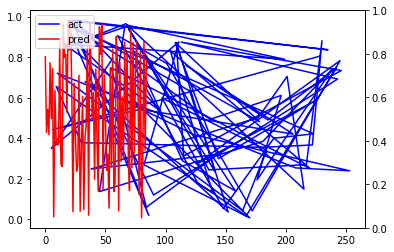

In [80]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

y_pred = pre_R2

# loss_ax.plot(y_test.reset_index(drop=True), 'b', label='act')
loss_ax.plot(y_test, 'b', label='act')


# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(y_pred, 'r', label='pred')

# acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper left')

plt.show()

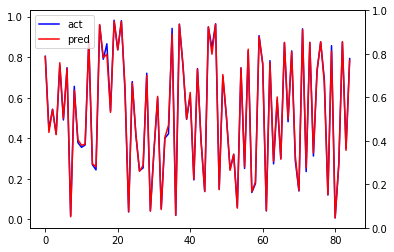

In [86]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

y_pred = pre_R2

loss_ax.plot(y_test.reset_index(drop=True), 'b', label='act')
# loss_ax.plot(y_test, 'b', label='act')


# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(y_pred, 'r', label='pred')

# acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper left')

plt.show()